# Customer Churn Prediction using Deep Neural Networks

- Student Name: Brandon Onthametse Kongwe
<br>
- Student Number: 239524007
<br>
- Module Code: CET313 
<br>
- Module Name: Artificial Intelligence
<br>
- Degree: BSc (Hons) Business Intelligence and Data Analytics
<br>
- Centre: Botswana Accountancy College
<br>
- Project Title: Customer Churn Prediction using Deep Neural Networks

# Introduction

Customer churn is when a company loses customers and is a prevalent issue in many industries as it has a major impact on a company’s revenue, and many companies are looking for ways to predict and subsequently prevent customer churn. The aim of this assignment is to produce a deep learning model capable of accurately predicting customer churn.

The work done in this project that goes beyond that covered in the lectures includes:
- Performing hyperparameter tuning using RandomizedSearchCV
- Building a deep neural network (DNN) using Keras
- Building a 1D convolutional neural network (1D CNN) for binary classification using Keras
- Using Dropout layers and weight constraints (maximum norm or MaxNorm) to minimize model overfitting
- Improving model interpretability by: 
 - visualizing training and validation loss and accuracy curves, 
 - visualizing the model architecture, 
 - visualizing the ROC curve (receiver operating characteristic curve), 
 - visualizing a confusion matrix showing how many instances in the test set were accurately predicted by the models. 
- Using Synthetic Minority Over-sampling Technique (SMOTE) to perform random oversampling on the minority class to balance the data


# Libraries
The following libraries should be installed to run this notebook:
- Tensorflow
- Keras
- Scikeras
- imblearn
- scikit-learn
- numpy
- pandas
- matplotlib
- seaborn
- keras-visualizer
- python-graphviz

In [98]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine learning libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE # pip install imblearn
import tensorflow as tf 
from keras.models import Sequential 
from keras.layers import Flatten 
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from keras.layers import Activation 
from keras.constraints import MaxNorm
from keras.utils.vis_utils import plot_model
from scikeras.wrappers import KerasClassifier # pip install scikeras
from keras_visualizer import visualizer # pip install keras-visualizer
import graphviz # conda install python-graphviz

# Model evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

import joblib

# Data Understanding  

The dataset used in this project is a telecommunications customer churn dataset containing 7043 records and 21 columns.  The dataset was sourced from Kaggle.com (https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
<br>

The following describes the columns present in the data (referred from Jauloma/GIT_LP3 on github.com)<br> link: https://github.com/Jauloma/GIT_LP3/blob/main/Code/Customer_Churn_LP3_(Team%20San%20Francisco).ipynb:

<b>Gender</b> -- Whether the customer is a male or a female

<b>SeniorCitizen</b> -- Whether a customer is a senior citizen or not

<b>Partner</b> -- Whether the customer has a partner or not (Yes, No)

<b>Dependents</b> -- Whether the customer has dependents or not (Yes, No)

<b>Tenure</b> -- Number of months the customer has stayed with the company

<b>Phone Service</b> -- Whether the customer has a phone service or not (Yes, No)

<b>MultipleLines</b> -- Whether the customer has multiple lines or not

<b>InternetService</b> -- Customer's internet service provider (DSL, Fiber Optic, No)

<b>OnlineSecurity</b> -- Whether the customer has online security or not (Yes, No, No Internet)

<b>OnlineBackup</b> -- Whether the customer has online backup or not (Yes, No, No Internet)

<b>DeviceProtection</b> -- Whether the customer has device protection or not (Yes, No, No internet service)

<b>TechSupport</b> -- Whether the customer has tech support or not (Yes, No, No internet)

<b>StreamingTV</b> -- Whether the customer has streaming TV or not (Yes, No, No internet service)

<b>StreamingMovies</b> -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

<b>Contract</b> -- The contract term of the customer (Month-to-Month, One year, Two year)

<b>PaperlessBilling</b> -- Whether the customer has paperless billing or not (Yes, No)

<b>Payment Method</b> -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

<b>MonthlyCharges</b> -- The amount charged to the customer monthly

<b>TotalCharges</b> -- The total amount charged to the customer

<b>Churn</b> -- Whether the customer churned or not (Yes or No)

In [2]:
# Import the dataset
data = pd.read_csv('churn.csv')

In [3]:
# Print out first five records in the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [4]:
# Get information on the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check for any missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Dropping any duplicates in the dataset
data.drop_duplicates(inplace=True, keep='first')

In [7]:
# Get all unique values in each column in the dataset
for column in data.columns:
    print(column, ":", data[column].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [8]:
# Show the number of unique values in each column
for column in data.columns:
    print(column, ":", data[column].nunique())

customerID : 7043
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2


In [9]:
# Check the data type of the TotalCharges column in the dataset
print(data['TotalCharges'].dtype)
print(data['MonthlyCharges'].dtype)

object
float64


In [10]:
# Check for non-numeric values by checking for NaN values in the column
data['TotalCharges'].isnull().any()

False

In [11]:
# Transform the TotalCharges column from object to float 
# Convert 'TotalCharges' to numeric type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [12]:
# Checking data type of the TotalCharges column in the dataset
data['TotalCharges'].dtype

dtype('float64')

In [13]:
# Check for any missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
# referred from Jauloma/GIT_LP3 on github.com
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
data['TotalCharges'] = imputer.fit_transform(data[['TotalCharges']])

In [15]:
# Check for any missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Visualization

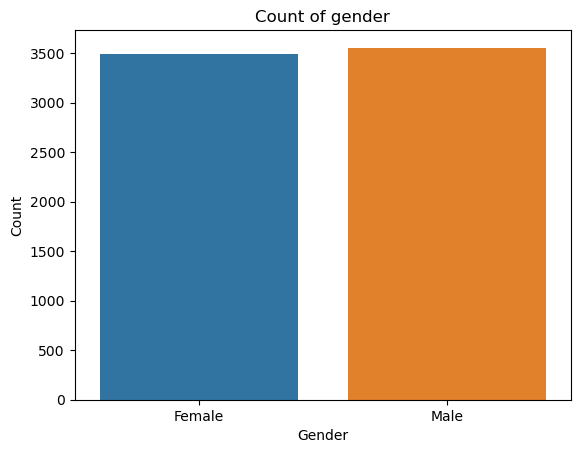

<Figure size 600x400 with 0 Axes>

In [16]:
# Plot for number of customers per gender
sns.countplot(data, x="gender")
# Adding label, title and size
plt.title('Count of gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.figure(figsize=(6,4))

plt.show()

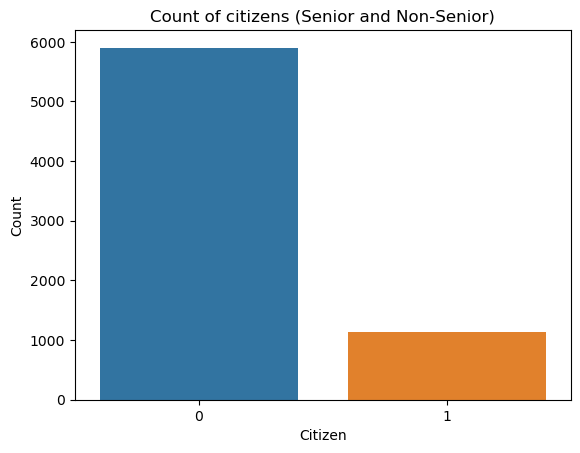

<Figure size 600x400 with 0 Axes>

In [17]:
# Plot for number of senior citizens and non-senior citizens
sns.countplot(data, x="SeniorCitizen")
# Adding label, title and size
plt.title('Count of citizens (Senior and Non-Senior)')
plt.xlabel('Citizen')
plt.ylabel('Count')
plt.figure(figsize=(6,4))

plt.show()

<Axes: xlabel='tenure', ylabel='Count'>

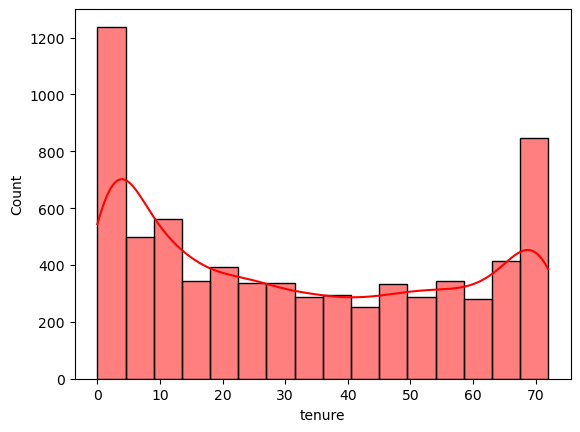

In [18]:
# Create a histogram plot
sns.histplot(data['tenure'], kde=True, color='red')

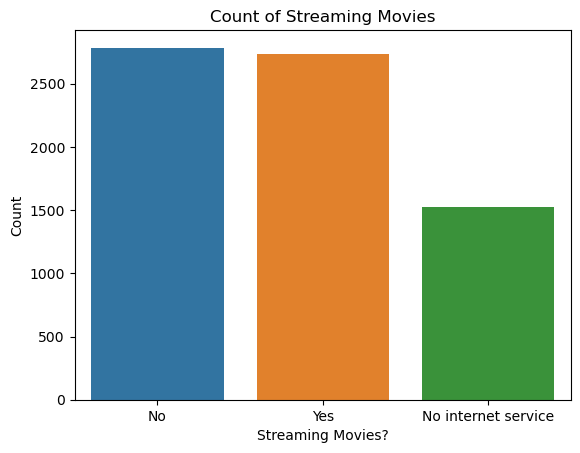

<Figure size 600x400 with 0 Axes>

In [19]:
# Plot for number of customers streaming movies
sns.countplot(data, x="StreamingMovies")
# Adding label, title and size
plt.title('Count of Streaming Movies')
plt.xlabel('Streaming Movies?')
plt.ylabel('Count')
plt.figure(figsize=(6,4))

plt.show()

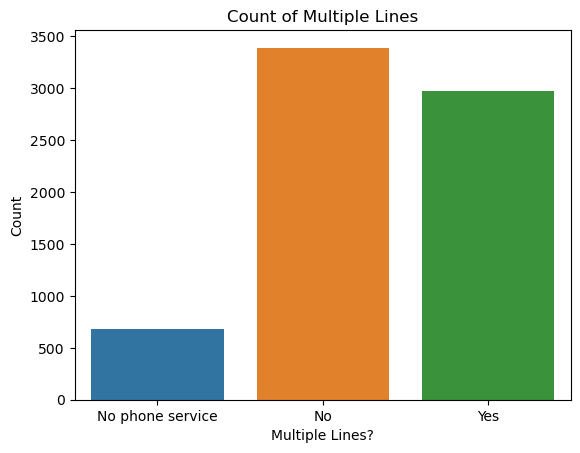

<Figure size 600x400 with 0 Axes>

In [20]:
# Plot for number of customers streaming movies
sns.countplot(data, x="MultipleLines")
# Adding label, title and size
plt.title('Count of Multiple Lines')
plt.xlabel('Multiple Lines?')
plt.ylabel('Count')
plt.figure(figsize=(6,4))

plt.show()

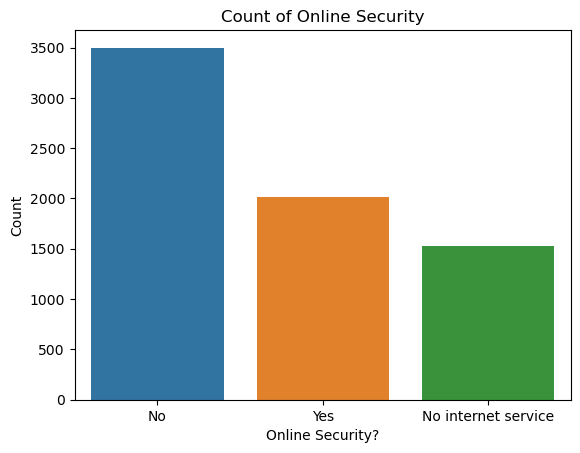

<Figure size 600x400 with 0 Axes>

In [21]:
# Plot for number of customers with online security
sns.countplot(data, x="OnlineSecurity")
# Adding label, title and size
plt.title('Count of Online Security')
plt.xlabel('Online Security?')
plt.ylabel('Count')
plt.figure(figsize=(6,4))

plt.show()

In [22]:
class_counts = data['Churn'].value_counts()
class_counts

No     5174
Yes    1869
Name: Churn, dtype: int64

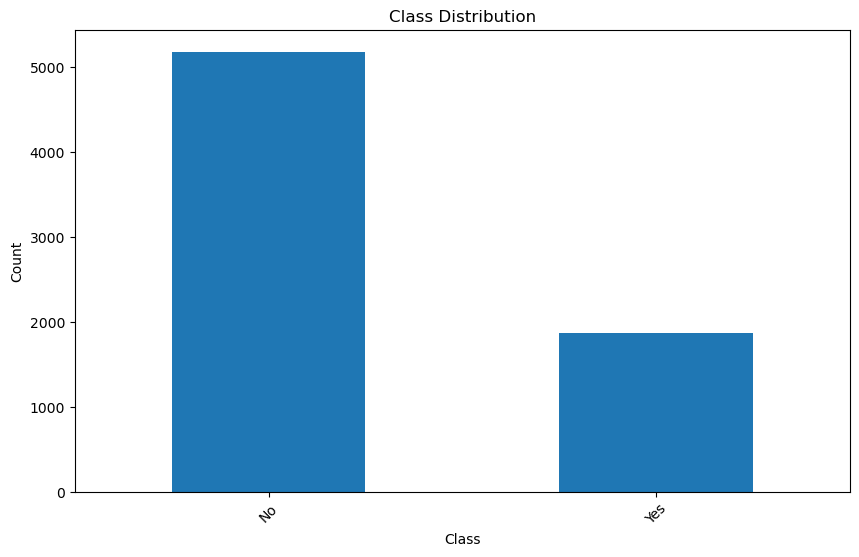

In [23]:
plt.figure(figsize=(10, 6)) 
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The class distribution above shows that the data is unbalanced. This can lead the model to be biased towards the majority class. Later in the notebook, random oversampling will be employed to balance the data for model development

<Axes: xlabel='Partner', ylabel='count'>

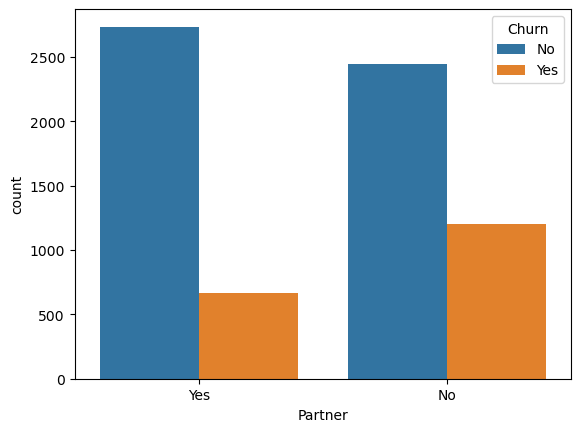

In [24]:
# Count of customers with partners, and seeing if churn is dependent on this
sns.countplot(data=data, x='Partner', hue='Churn')

This plot shows that customers without partners are more likely to churn compared to those with partners.

<Axes: xlabel='Dependents', ylabel='count'>

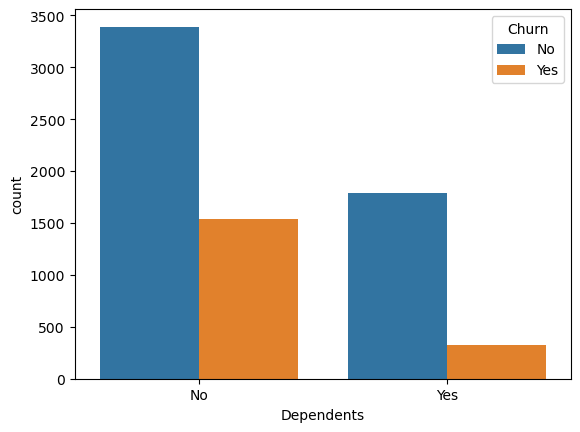

In [25]:
# Count of customers with dependents, and seeing if churn is dependent on this
sns.countplot(x='Dependents', hue='Churn', data=data)

This plot shows that customers with no dependents are more likely to churn than those with dependents

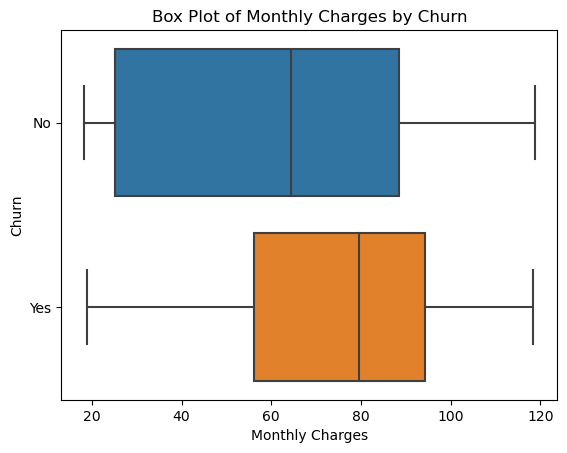

In [26]:
# create a box plot using boxplot() function
sns.boxplot(x="MonthlyCharges", y="Churn", data=data)

# set x-axis and y-axis labels and plot title
plt.xlabel("Monthly Charges")
plt.ylabel("Churn")
plt.title("Box Plot of Monthly Charges by Churn")

# display the plot
plt.show()

The box plot above shows that customers with higher monthly charges are more likely to churn when compared to customers with lower monthly charges.

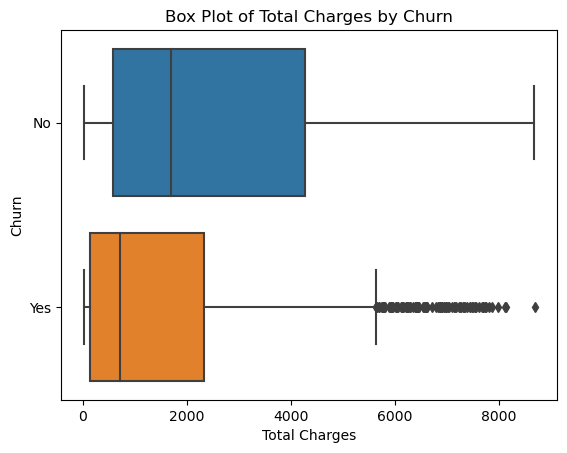

In [27]:
# create a box plot using boxplot() function
sns.boxplot(x="TotalCharges", y="Churn", data=data)

# set x-axis and y-axis labels and plot title
plt.xlabel("Total Charges")
plt.ylabel("Churn")
plt.title("Box Plot of Total Charges by Churn")

# display the plot
plt.show()

The box plot above shows that there are many outliers in the TotalCharges column, exclusively for customers who churned. Most of these customers had total charges exceeding the typical amount amongst other customers, which most probably contributed to them leaving the company

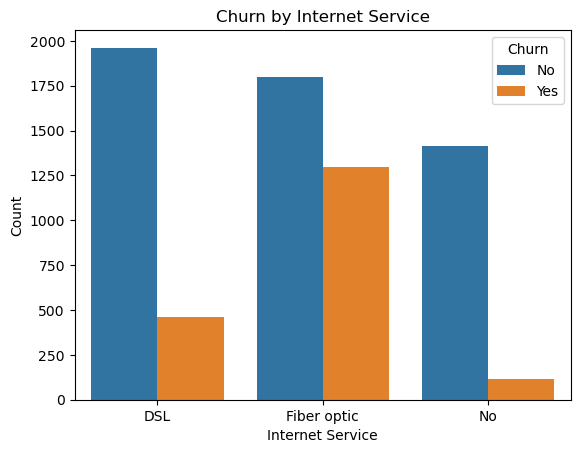

In [28]:
sns.countplot(data=data, x='InternetService', hue='Churn')
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.title("Churn by Internet Service")
plt.show()

The plot above shows that customers who have subscribed for Fiber obtic internet service are more likely to churn than those with either no internet service or DSL.

<Figure size 1600x1400 with 0 Axes>

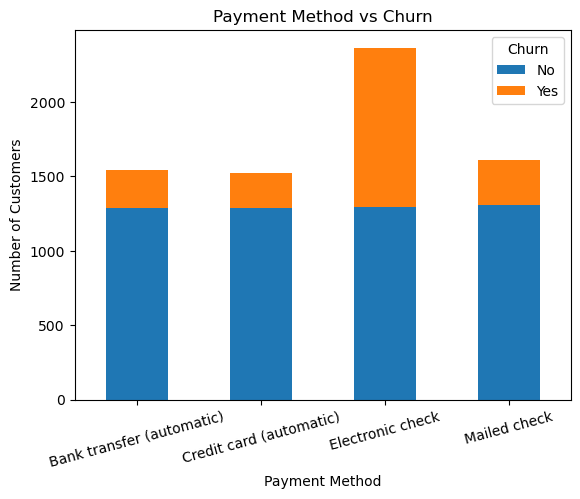

In [29]:
# create a contingency table of PaymentMethod and Churn
payment_churn_table = pd.crosstab(data['PaymentMethod'], data['Churn'])

plt.figure(figsize=(16,14))
# create a stacked bar plot
payment_churn_table.plot(kind='bar', stacked=True)

# set plot title and axis labels
plt.title('Payment Method vs Churn')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')

plt.xticks(rotation=15)

# display the plot
plt.show()

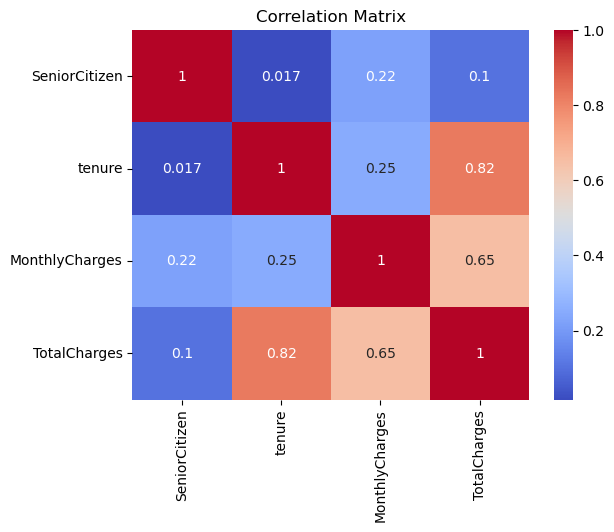

In [30]:
# compute the correlation matrix
corr_matrix = data.corr()

# create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# set the title
plt.title('Correlation Matrix')

# show the plot
plt.show()

# Deep Learning Model Development

The function below performs data preparation. It converts categorical data into numerical data to make training the model possible. 
<br> The function was sourced from: https://github.com/archd3sai/Customer-Survival-Analysis-and-Churn-Prediction 

In [31]:
# referred from archd3sai/Customer-Survival-Analysis-and-Churn-Prediction on github.com
def datapreparation(filepath):
    
    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)
    
    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges.fillna(0, inplace = True)
    df.TotalCharges = df.TotalCharges.astype(float)
    
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
    
    return df

In [32]:
df = datapreparation("churn.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [33]:
# Assigning the independent variables to X and
# the dependent variable (Churn) to y
X = df.drop(["Churn"], axis=1)
y = df["Churn"]

# Random oversampling using SMOTE
Random oversampling on the minority class is used to balance the data, in an effort to reduce model bias towards the majority class.

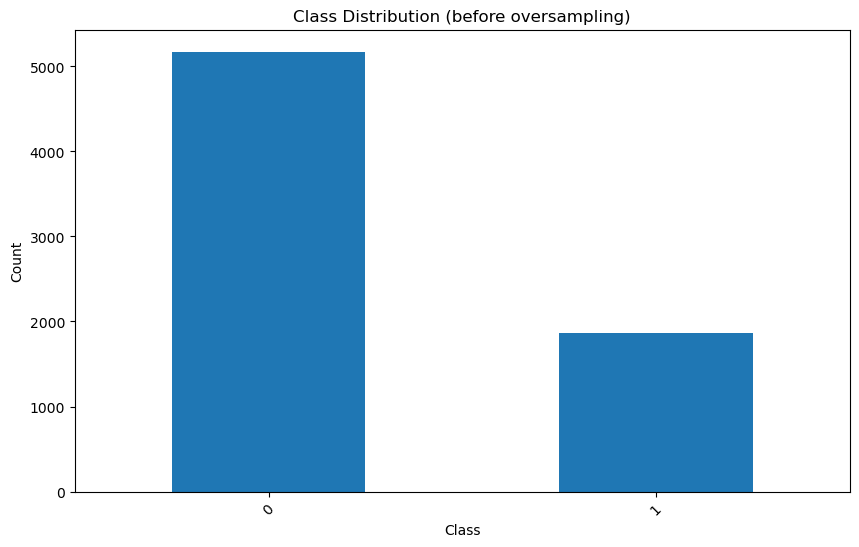

In [34]:
# Get the number of 0 and 1 values
class_counts = y.value_counts()
class_counts
    
# Plotting the bar chart
plt.figure(figsize=(10, 6)) 
class_counts.plot(kind='bar')
plt.title('Class Distribution (before oversampling)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

0: No
<br>
1: Yes

In [35]:
# Using Synthetic Minority Over-sampling Technique (SMOTE) to
# balance the data
samp = SMOTE(sampling_strategy='minority', random_state=1)
X, y = samp.fit_resample(X, y)

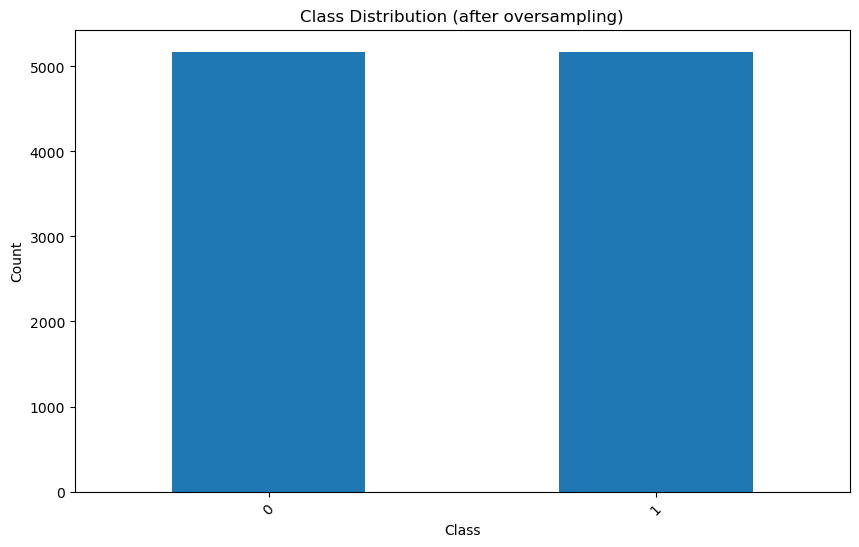

In [36]:
# Get the number of 0 and 1 values
class_counts = y.value_counts()
class_counts
    
# Plotting the bar chart
plt.figure(figsize=(10, 6)) 
class_counts.plot(kind='bar')
plt.title('Class Distribution (after oversampling)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

0: No
<br>
1: Yes

In [37]:
# Getting the shape of the data after oversampling
X.shape

(10348, 23)

# Data splitting
The data is split into training, validation, and test data in 80:10:10 splits. The training and validation data will be fit to the models for training and the test data will be used to perform prediction and test the models' performance on unseen data.

In [38]:
# split the dataset into training, validation, and test data (80:10:10 split)
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=1)

In [39]:
# Getting the shape of the training and test data
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((8278, 23), (8278,), (1035, 23), (1035,), (1035, 23), (1035,))

In [40]:
X.shape[1]

23

# Data Normalization using MinMaxScaler
The training, validation, and test data is normalized using the MinMaxScaler from Scikit-learn. This is done to ensure that the values in the data fall within a defined range and contribute equally to the analysis.

In [41]:
# Normalizing the data
min_scaler = MinMaxScaler()
x_train = min_scaler.fit_transform(x_train)
x_val = min_scaler.transform(x_val)
x_test = min_scaler.transform(x_test)

# Building the Deep Neural Network

# First model (Deep Neural Network)

The first model developed is a deep neural network consisting of an input layer, two hidden layers with 20 neurons each, a dropout layer after each hidden layer, and the output layer. The early stopping technique is used to stop the training process once the validation loss stops improving. The hyperparameters used were chosen at random:

- epochs: 100
- batch size: 10
- optimizer: Stochastic gradient descent (SGD)
- initializer: uniform
- activation function: Rectified linear unit (ReLU)
- dropout rate: 0.2
- weight constraints: 2.0
- neurons: 20

**NOTE: The results you get after running the cells from now until the end of the notebook may end up yielding different results from the ones stated in the notebook due to the stochastic nature of machine learning models.**

In [42]:
# Setting a random seed to ensure reproducible results
seed = 7
tf.random.set_seed(seed)

In [43]:
# early stopping used to stop training once validation loss ceases to imporve
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# define the model
dnn_model = Sequential()
# input layer has 23 neurons, first dense hidden layer has 20 neurons
dnn_model.add(Dense(20, input_dim=x_train.shape[1], kernel_initializer='uniform', activation='relu', 
                kernel_constraint=MaxNorm(2))) 
# dropout layer to reduce overfitting
dnn_model.add(Dropout(rate = 0.2)) 
# second dense hidden layer with 20 neurons
dnn_model.add(Dense(20, kernel_initializer='uniform', activation='relu', kernel_constraint=MaxNorm(2)))
dnn_model.add(Dropout(rate = 0.2))
# output layer
dnn_model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# compile the model
dnn_model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
# Fit the model with training and validation data
history = dnn_model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_val, y_val), callbacks=[callback])
len(history.history['loss'])

Epoch 1/100
828/828 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.4860
Epoch 2/100
828/828 [==============================] - 2s 2ms/step - loss: 0.6930 - accuracy: 0.5053 - val_loss: 0.6933 - val_accuracy: 0.4860
Epoch 3/100
828/828 [==============================] - 2s 2ms/step - loss: 0.6930 - accuracy: 0.5091 - val_loss: 0.6933 - val_accuracy: 0.4860
Epoch 4/100
828/828 [==============================] - 2s 3ms/step - loss: 0.6929 - accuracy: 0.5065 - val_loss: 0.6929 - val_accuracy: 0.4860
Epoch 5/100
828/828 [==============================] - 2s 2ms/step - loss: 0.6923 - accuracy: 0.5274 - val_loss: 0.6920 - val_accuracy: 0.4860
Epoch 6/100
828/828 [==============================] - 2s 2ms/step - loss: 0.6905 - accuracy: 0.6412 - val_loss: 0.6886 - val_accuracy: 0.6705
Epoch 7/100
828/828 [==============================] - 2s 3ms/step - loss: 0.6797 - accuracy: 0.7232 - val_loss: 0.6613 - val_accuracy: 0.7768

Epoch 58/100
828/828 [==============================] - 2s 2ms/step - loss: 0.3733 - accuracy: 0.8304 - val_loss: 0.3622 - val_accuracy: 0.8357
Epoch 59/100
828/828 [==============================] - 2s 2ms/step - loss: 0.3753 - accuracy: 0.8303 - val_loss: 0.3642 - val_accuracy: 0.8348
Epoch 60/100
828/828 [==============================] - 2s 2ms/step - loss: 0.3761 - accuracy: 0.8287 - val_loss: 0.3598 - val_accuracy: 0.8367
Epoch 61/100
828/828 [==============================] - 2s 2ms/step - loss: 0.3724 - accuracy: 0.8322 - val_loss: 0.3675 - val_accuracy: 0.8300
Epoch 62/100
828/828 [==============================] - 2s 3ms/step - loss: 0.3686 - accuracy: 0.8315 - val_loss: 0.3592 - val_accuracy: 0.8357
Epoch 63/100
828/828 [==============================] - 2s 2ms/step - loss: 0.3694 - accuracy: 0.8265 - val_loss: 0.3604 - val_accuracy: 0.8357
Epoch 64/100
828/828 [==============================] - 2s 2ms/step - loss: 0.3718 - accuracy: 0.8280 - val_loss: 0.3639 - val_accuracy:

95

In [44]:
# Getting the architecture of the model
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                480       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 921
Trainable params: 921
Non-trainable params: 0
_________________________________________________________________


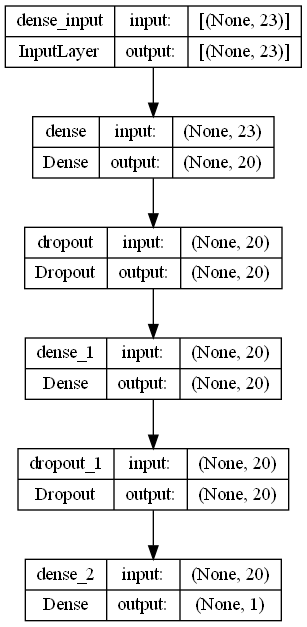

In [45]:
# visualizing the architecture of themodel
plot_model(dnn_model, to_file='dnn_model_arc.png', show_shapes=True)

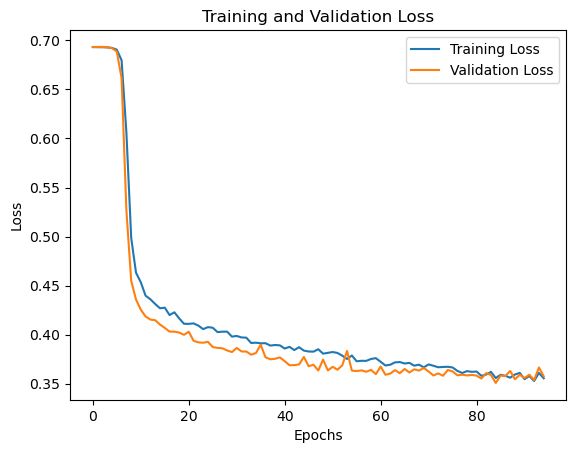

In [46]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The plot above shows that the difference between the training and validation loss begins to shrink towards the end of the model training, showing that the model has a relatively good fit to the data.

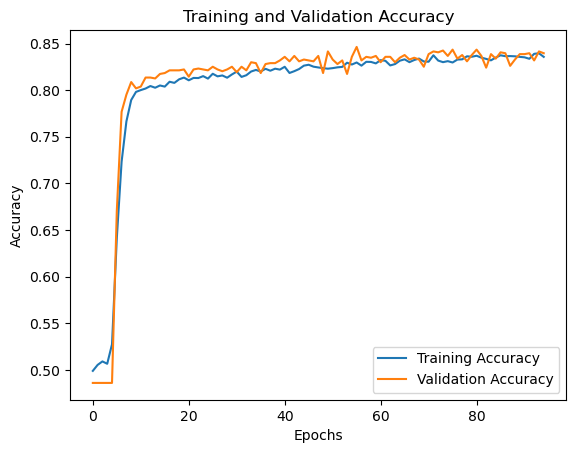

In [47]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The plot above shows that the model shows comparable skill on both the training and validation data. 

# Performing prediction on the test set

In [48]:
# Performing prediction on the testing set
y_pred = dnn_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
y_pred

33/33 [==============================] - 0s 2ms/step


array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [49]:
# Printing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[438,  96],
       [ 63, 438]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

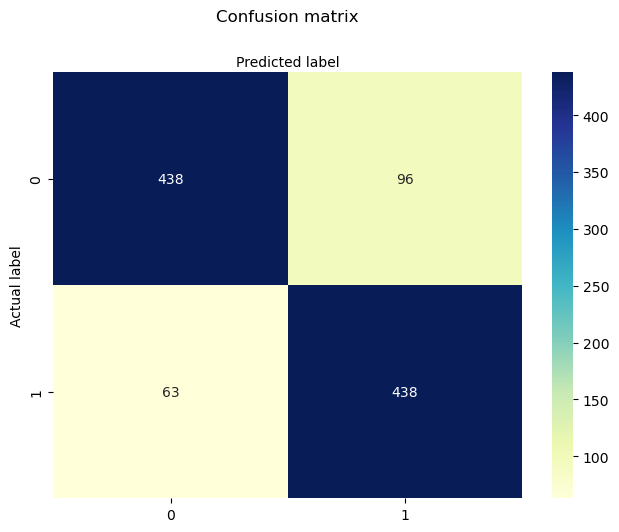

In [50]:
# visualizing the confusion matrix
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create a heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The confusion matrix for the model indicates the following:

1. True Positive (TP): There are 438 instances that are correctly predicted as positive (actual positive and predicted positive).
2. True Negative (TN): There are 438 instances that are correctly predicted as negative (actual negative and predicted negative).
3. False Positive (FP): There are 96 instances that are incorrectly predicted as positive (actual negative but predicted positive).
4. False Negative (FN): There are 63 instances that are incorrectly predicted as negative (actual positive but predicted negative).

In [51]:
# Getting the accuracy score of the model
score = accuracy_score(y_test, y_pred)
score

0.8463768115942029

In [52]:
# Getting the Receiver Operating Characteristic (ROC) score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8472381080535558


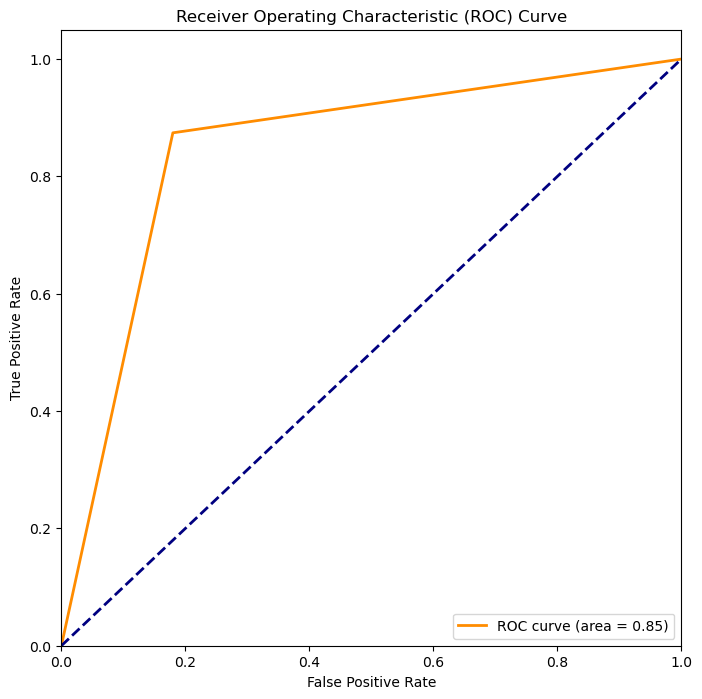

ROC AUC Score: 0.8472381080535558


In [53]:
# Visualizing the ROC AUC curve
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'ROC AUC Score: {roc_auc}')

The model has an AUC of **0.85** which suggests that it displays satisfactory classification capabilities on the testing set.

In [54]:
# getting the loss and accuracy of the model
dnn_eval = dnn_model.evaluate(x_test, y_test)
dnn_eval

33/33 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8464


[0.3367516100406647, 0.8463768362998962]

The model has a loss of **0.34** and an accuracy of **0.85**, which suggests it has a satifactory performance.

In [55]:
# Referred from Jauloma/GIT_LP3 on github.com
# Create a function to evaluate the models' performance in predicting the minority class ("Yes" or 1)
def evaluate(actual,predicted,model_name):
    PrecisionScore = precision_score(actual,predicted,pos_label=1)
    RecallScore = recall_score(actual,predicted,pos_label=1)
    F1_score = f1_score(actual,predicted,pos_label=1)
    Accuracy = accuracy_score(actual,predicted)

    result={'Model':model_name, 'Precision_Score':PrecisionScore,'Recall_Score':RecallScore,'F1_Score':F1_score,'Accuracy':Accuracy}
  
    return result

In [56]:
# Evaluate the models' performance in predicting the minority class ("Yes" or 1)
dnn_evaluate = evaluate(y_test, y_pred, dnn_model)
dnn_evaluate

{'Model': <keras.engine.sequential.Sequential at 0x23d01a48f70>,
 'Precision_Score': 0.8202247191011236,
 'Recall_Score': 0.874251497005988,
 'F1_Score': 0.8463768115942029,
 'Accuracy': 0.8463768115942029}

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       534
           1       0.82      0.87      0.85       501

    accuracy                           0.85      1035
   macro avg       0.85      0.85      0.85      1035
weighted avg       0.85      0.85      0.85      1035



**These results indicate the performance of a binary classification model on the "No" (0) and "Yes" (1) classes.**

The model performs relatively well in predicting both classes with high precision, recall, accuracy, and F1-score. The training and validation loss and accuracy curves show that the model has a good fit on the data.

# Second model (1D CNN)
The second model developed is a 1D convolutional neural network (CNN) consisting of an input layer, 1 convolutional layer with 32 filters, a max pooling layer, a flatten layer, one dense layer with 64 neurons, a dropout layer after the max pooling layer and dense layer, and the output layer. The early stopping technique is used to stop the training process once the validation loss stops improving. The hyperparameters used were chosen at random.

- epochs: 100
- batch size: 10
- filters: 32
- kernel size: 2
- optimizer: Stochastic gradient descent (SGD)
- initializer: uniform
- activation function: Rectified linear unit (ReLU)
- dropout rate: 0.2
- weight constraints: 2.0
- neurons in dense layer: 64

**NOTE: The results you get after running the cells from now until the end of the notebook may end up yielding different results from the ones stated in the notebook due to the stochastic nature of machine learning models.**

In [58]:
# Setting a random seed to ensure reproducible results
seed = 7
tf.random.set_seed(seed)

In [59]:
# early stopping used to stop training once validation loss ceases to imporve
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# Define the model
cnn_model = Sequential()

# 1D convolutional layer with 32 filters, kernel size 2, and input shape (23, 1)
cnn_model.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=(23, 1)))

# Max pooling layer with pool size 2
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))

# Flatten layer to feed dense layer
cnn_model.add(Flatten())

# Dense layer with 64 neurons 
cnn_model.add(Dense(64, kernel_initializer='uniform', activation='relu', kernel_constraint=MaxNorm(2)))
cnn_model.add(Dropout(0.2))

# Output layer  
cnn_model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the model 
cnn_model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model with training and validation data
history=cnn_model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_val, y_val), callbacks=[callback])
len(history.history['loss'])

Epoch 1/100
828/828 [==============================] - 4s 4ms/step - loss: 0.6813 - accuracy: 0.6715 - val_loss: 0.6516 - val_accuracy: 0.7285
Epoch 2/100
828/828 [==============================] - 3s 4ms/step - loss: 0.5673 - accuracy: 0.7678 - val_loss: 0.4751 - val_accuracy: 0.7894
Epoch 3/100
828/828 [==============================] - 3s 4ms/step - loss: 0.4631 - accuracy: 0.7929 - val_loss: 0.4419 - val_accuracy: 0.8019
Epoch 4/100
828/828 [==============================] - 3s 3ms/step - loss: 0.4460 - accuracy: 0.8007 - val_loss: 0.4341 - val_accuracy: 0.8048
Epoch 5/100
828/828 [==============================] - 3s 3ms/step - loss: 0.4368 - accuracy: 0.8035 - val_loss: 0.4302 - val_accuracy: 0.8029
Epoch 6/100
828/828 [==============================] - 3s 3ms/step - loss: 0.4346 - accuracy: 0.8047 - val_loss: 0.4260 - val_accuracy: 0.8097
Epoch 7/100
828/828 [==============================] - 3s 3ms/step - loss: 0.4299 - accuracy: 0.8083 - val_loss: 0.4223 - val_accuracy: 0.8087

Epoch 58/100
828/828 [==============================] - 3s 3ms/step - loss: 0.3852 - accuracy: 0.8233 - val_loss: 0.3861 - val_accuracy: 0.8126
Epoch 59/100
828/828 [==============================] - 3s 3ms/step - loss: 0.3877 - accuracy: 0.8225 - val_loss: 0.3841 - val_accuracy: 0.8164
Epoch 60/100
828/828 [==============================] - 3s 3ms/step - loss: 0.3837 - accuracy: 0.8221 - val_loss: 0.3844 - val_accuracy: 0.8155
Epoch 61/100
828/828 [==============================] - 3s 3ms/step - loss: 0.3845 - accuracy: 0.8222 - val_loss: 0.3853 - val_accuracy: 0.8145
Epoch 62/100
828/828 [==============================] - 3s 3ms/step - loss: 0.3844 - accuracy: 0.8222 - val_loss: 0.3847 - val_accuracy: 0.8106
Epoch 63/100
828/828 [==============================] - 3s 4ms/step - loss: 0.3844 - accuracy: 0.8198 - val_loss: 0.3830 - val_accuracy: 0.8145
Epoch 64/100
828/828 [==============================] - 3s 3ms/step - loss: 0.3824 - accuracy: 0.8239 - val_loss: 0.3846 - val_accuracy:

100

In [60]:
# Getting the architecture of the model
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22, 32)            96        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 32)           0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 11, 32)            0         
                                                                 
 flatten (Flatten)           (None, 352)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                22592     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                      

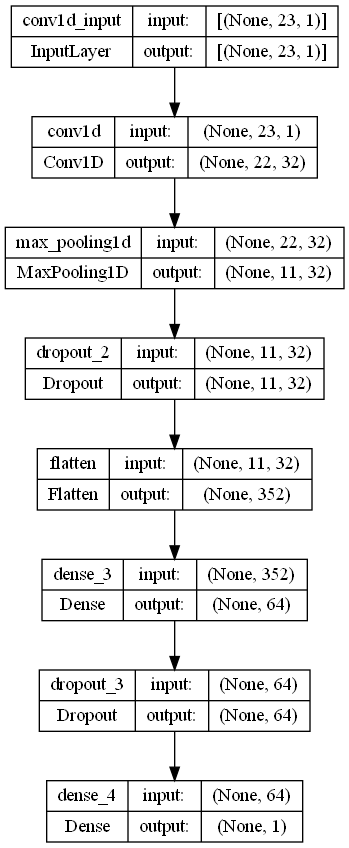

In [61]:
# visualizing the architecture of themodel
plot_model(cnn_model, to_file='cnn_model_arc.png', show_shapes=True)

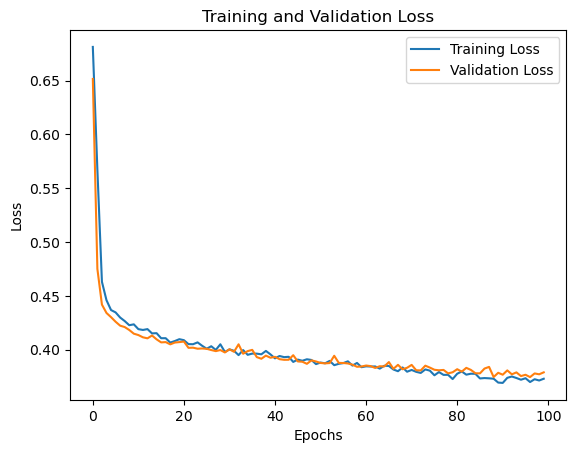

In [62]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The plot above shows that that the model has a relatively good fit to the data as the difference between the loss on the training and validation data is minimal throughout training. The validation loss, however, begins to increase towards the end hinting that the model may have began to overfit had training continued.

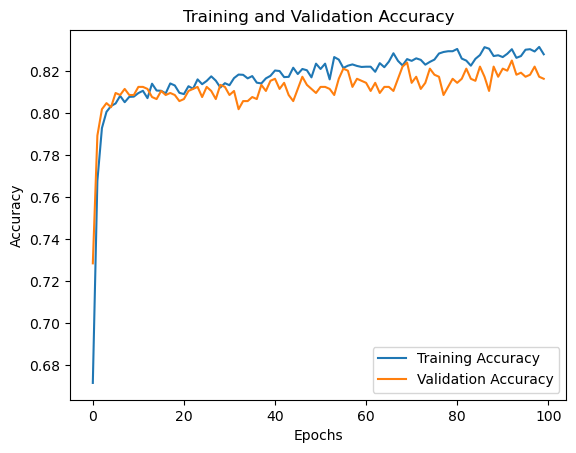

In [63]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The plot above shows that the model produced better accuracy on the training compared to the validation data. This may hint at the model slightly overfitting

# Performing prediction on the test set

In [64]:
y_pred_cnn = cnn_model.predict(x_test)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int)
y_pred_cnn

33/33 [==============================] - 0s 2ms/step


array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [65]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_cnn)
cm

array([[431, 103],
       [ 67, 434]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

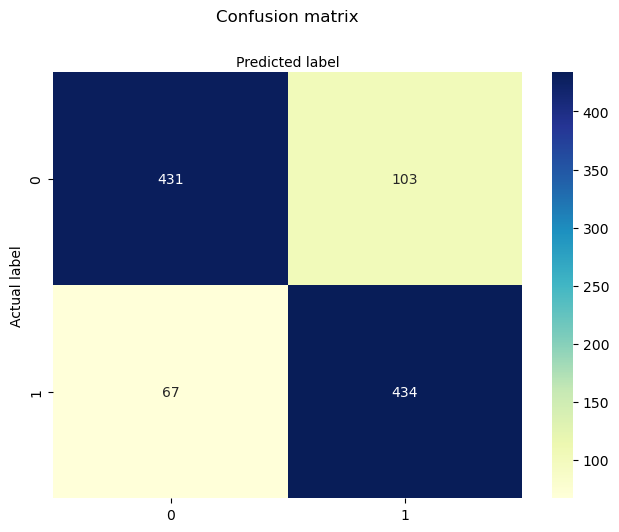

In [66]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The confusion matrix for the model indicates the following:

1. True Positive (TP): There are 431 instances that are correctly predicted as positive (actual positive and predicted positive).
2. True Negative (TN): There are 434 instances that are correctly predicted as negative (actual negative and predicted negative).
3. False Positive (FP): There are 103 instances that are incorrectly predicted as positive (actual negative but predicted positive).
4. False Negative (FN): There are 67 instances that are incorrectly predicted as negative (actual positive but predicted negative).

In [67]:
score = accuracy_score(y_test, y_pred_cnn)
score

0.8357487922705314

In [68]:
roc_auc = roc_auc_score(y_test, y_pred_cnn)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.836691784969387


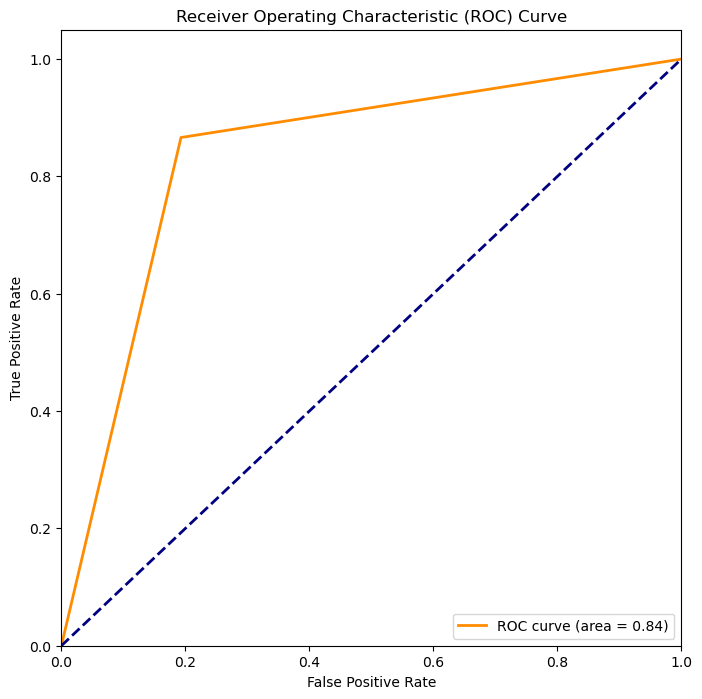

ROC AUC Score: 0.836691784969387


In [69]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_cnn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'ROC AUC Score: {roc_auc}')

The model has an AUC of **0.84** which suggests that it displays satisfactory classification capabilities on the testing set.

In [70]:
# getting the loss and accuracy of the network
cnn_eval = cnn_model.evaluate(x_test, y_test)
cnn_eval

33/33 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.8357


[0.3621099889278412, 0.8357487916946411]

The model has a loss of **0.36** and an accuracy of **0.84**, which suggests it has a satifactory performance.

In [71]:
# Evaluate the models' performance in predicting the minority class ("Yes" or 1)
cnn_evaluate = evaluate(y_test, y_pred_cnn, cnn_model)
cnn_evaluate

{'Model': <keras.engine.sequential.Sequential at 0x23d05bdc160>,
 'Precision_Score': 0.8081936685288641,
 'Recall_Score': 0.8662674650698603,
 'F1_Score': 0.8362235067437379,
 'Accuracy': 0.8357487922705314}

In [72]:
print(classification_report(y_test, y_pred_cnn))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       534
           1       0.81      0.87      0.84       501

    accuracy                           0.84      1035
   macro avg       0.84      0.84      0.84      1035
weighted avg       0.84      0.84      0.84      1035



**These results indicate the performance of a binary classification model on the "No" (0) and "Yes" (1) classes.**

The model performs relatively well in predicting both classes with high precision, recall, accuracy, and F1-score. The training and validation loss and accuracy curves show that the model has a relatively good fit on the data, although they also show that the model may have began overfitting on the data towards the end of model training

# Model Evaluation

In [73]:
model_eval = pd.DataFrame({
    "Deep Neural Network": dnn_evaluate,
    "1D Convolutional Neural Network": cnn_evaluate
})
model_eval

,Deep Neural Network,1D Convolutional Neural Network
Model,<keras.engine.sequential.Sequential object at ...,<keras.engine.sequential.Sequential object at ...
Precision_Score,0.820225,0.808194
Recall_Score,0.874251,0.866267
F1_Score,0.846377,0.836224
Accuracy,0.846377,0.835749


The dataframe above shows that the Deep Neural Network outperforms the 1D CNN in terms of precision, recall, F1-score, and accuracy

# Hyperparameter Tuning using RandomizedSearchCV

Hyperparameter tuning is performed to find the most optimal hyperparameters for machine learning models. In this project, RandomizedSearchCV was used to perform the tuning instead of GridSearchCV due to taking less processing time. RandomizedSearchCV chooses the hyperparameter sample combinations randomly from the grid space as opposed to trying every possible combination of each set of hyper-parameters like GridSearchCV. Hyperparameter tuning was performed and the best parameters were found to be:

- epochs: 100
- batch size: 10
- optimizer: Adam
- initializer: normal
- activation function: relu
- dropout rate: 0.2
- weight constraints: 3.0
- neurons: 200

<b>NOTE:</b> Running the hyperparameter tuning cells will take a considerable amount of time, depending on the computational power of your machine. A comparison of the first DNN model and the new DNN after tuning is placed near the end of the notebook

A tutorial on machinelearningmastery.com was used as inspiration for performing this task. The tutorial is about performing hyperparameter tuning using GridSearchCV, so the code from the tutorial was edited to use RandomizedSearchCV instead, with 200 iterations for each random search. 
<br><br>
Link to the tutorial: (https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/)

**NOTE: The results you get after running the tuning cells may end up yielding different resultsfrom the ones stated in the notebook due to the stochastic nature of RandomizedSearchCV.**

In [73]:
# define the model
def create_model():
    model = Sequential()
    model.add(Dense(20, input_shape=(23,), activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(1, activation='sigmoid'))
    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

In [74]:
# Setting a random seed to ensure reproducible results
seed = 7
tf.random.set_seed(seed)

In [75]:
model = KerasClassifier(model=create_model, verbose=0)

In [76]:
# define the random search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100, 150]

param_grid = dict(batch_size=batch_size, epochs=epochs)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3, n_iter=200)
random_result = random_search.fit(x_train, y_train)
print('Best Score: ', random_result.best_score_*100)
print('Best Params: ', random_result.best_params_)

Best Score:  82.99123816127457
Best Params:  {'epochs': 100, 'batch_size': 10}


In [77]:
def create_model():
    model = Sequential()
    model.add(Dense(20, input_shape=(23,), kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    return model

In [78]:
model = KerasClassifier(model=create_model, loss="binary_crossentropy", epochs=100, batch_size=10, verbose=0)

In [79]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3, n_iter=200)
random_result = random_search.fit(x_train, y_train)
print('Best Score: ', random_result.best_score_*100)
print('Best Params: ', random_result.best_params_)

Best Score:  83.66766734429089
Best Params:  {'optimizer': 'Adam'}


In [80]:
def create_model(init_mode='uniform'):
    model = Sequential()
    model.add(Dense(20, input_shape=(23,), kernel_initializer=init_mode, activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(20, kernel_initializer=init_mode, activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [81]:
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

In [82]:
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(model__init_mode=init_mode)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3, n_iter=200)
random_result = random_search.fit(x_train, y_train)
print('Best Score: ', random_result.best_score_*100)
print('Best Params: ', random_result.best_params_)

Best Score:  83.74017488658113
Best Params:  {'model__init_mode': 'normal'}


In [83]:
def create_model(activation='relu'):
    model = Sequential()
    model.add(Dense(20, input_shape=(23,), kernel_initializer='normal', activation=activation))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(20, kernel_initializer='normal', activation=activation))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [84]:
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

In [85]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(model__activation=activation)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3, n_iter=200)
random_result = random_search.fit(x_train, y_train)
print('Best Score: ', random_result.best_score_*100)
print('Best Params: ', random_result.best_params_)

Best Score:  83.86090843668416
Best Params:  {'model__activation': 'relu'}


In [86]:
def create_model(dropout_rate, weight_constraint):
    model = Sequential()
    model.add(Dense(20, input_shape=(23,), kernel_initializer='normal', activation='relu', 
                    kernel_constraint=MaxNorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(20, kernel_initializer='normal', activation='relu', 
                    kernel_constraint=MaxNorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [87]:
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

In [88]:
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3, n_iter=200)
random_result = random_search.fit(x_train, y_train)
print('Best Score: ', random_result.best_score_*100)
print('Best Params: ', random_result.best_params_)

Best Score:  83.8367582247296
Best Params:  {'model__weight_constraint': 3.0, 'model__dropout_rate': 0.2}


In [89]:
def create_model(neurons):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(23,), kernel_initializer='normal', activation='relu', 
                    kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(neurons, kernel_initializer='normal', activation='relu', 
                    kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [90]:
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

In [91]:
neurons = [10, 15, 20, 25, 30, 35, 40, 45, 50]
param_grid = dict(model__neurons=neurons)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3, n_iter=200)
random_result = random_search.fit(x_train, y_train)
print('Best Score: ', random_result.best_score_*100)
print('Best Params: ', random_result.best_params_)

Best Score:  83.92133430687097
Best Params:  {'model__neurons': 30}


# Third model (Tuned Deep Neural Network)

The third model developed is a deep neural network consisting of an input layer, two hidden layers with 30 neurons each, a dropout layer after each hidden layer, and the output layer. The early stopping technique is used to stop the training process once the validation loss stops improving. The hyperparameters used were the ones found during the hyperparameter tuning:

- epochs: 100
- batch size: 10
- optimizer: Adam
- initializer: normal
- activation function: Rectified linear unit (ReLU)
- dropout rate: 0.2
- weight constraints: 3.0
- neurons: 30

**NOTE: The results you get after running the cells from now until the end of the notebook may end up yielding different results from the ones stated in the notebook due to the stochastic nature of machine learning models.**

In [74]:
# Setting a random seed to ensure reproducible results
seed = 7
tf.random.set_seed(seed)

In [75]:
# early stopping used to stop training once validation loss ceases to imporve
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# define the model
dnn_model2 = Sequential()
# input layer has 23 neurons, first dense hidden layer has 30 neurons
dnn_model2.add(Dense(30, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu', 
                kernel_constraint=MaxNorm(3))) 
# dropout layer to reduce overfitting
dnn_model2.add(Dropout(rate = 0.2)) 
# second dense hidden layer with 30 neurons
dnn_model2.add(Dense(30, kernel_initializer='normal', activation='relu', kernel_constraint=MaxNorm(3)))
dnn_model2.add(Dropout(rate = 0.2))
# output layer
dnn_model2.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# compile the model
dnn_model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
# Fit the model with training and validation data
history = dnn_model2.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_val, y_val), callbacks=[callback])
len(history.history['loss'])

Epoch 1/100
828/828 [==============================] - 3s 3ms/step - loss: 0.4770 - accuracy: 0.7798 - val_loss: 0.4197 - val_accuracy: 0.8135
Epoch 2/100
828/828 [==============================] - 2s 3ms/step - loss: 0.4157 - accuracy: 0.8123 - val_loss: 0.4007 - val_accuracy: 0.8203
Epoch 3/100
828/828 [==============================] - 2s 3ms/step - loss: 0.4051 - accuracy: 0.8159 - val_loss: 0.3958 - val_accuracy: 0.8126
Epoch 4/100
828/828 [==============================] - 2s 3ms/step - loss: 0.3989 - accuracy: 0.8160 - val_loss: 0.3856 - val_accuracy: 0.8222
Epoch 5/100
828/828 [==============================] - 2s 3ms/step - loss: 0.3936 - accuracy: 0.8204 - val_loss: 0.3841 - val_accuracy: 0.8184
Epoch 6/100
828/828 [==============================] - 2s 3ms/step - loss: 0.3887 - accuracy: 0.8169 - val_loss: 0.3807 - val_accuracy: 0.8242
Epoch 7/100
828/828 [==============================] - 2s 3ms/step - loss: 0.3870 - accuracy: 0.8206 - val_loss: 0.3803 - val_accuracy: 0.8222

57

In [76]:
# Getting the architecture of the model
dnn_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                720       
                                                                 
 dropout_4 (Dropout)         (None, 30)                0         
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dropout_5 (Dropout)         (None, 30)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________


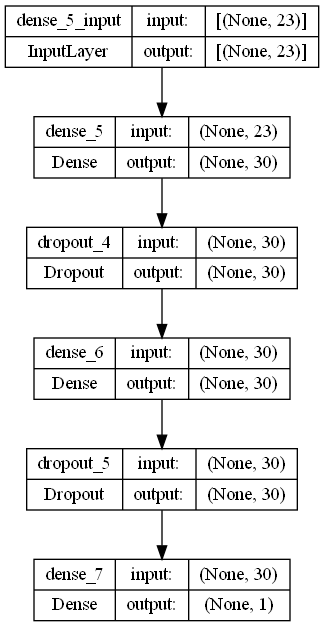

In [77]:
# visualizing the architecture of themodel
plot_model(dnn_model2, to_file='dnn_model2_arc.png', show_shapes=True)

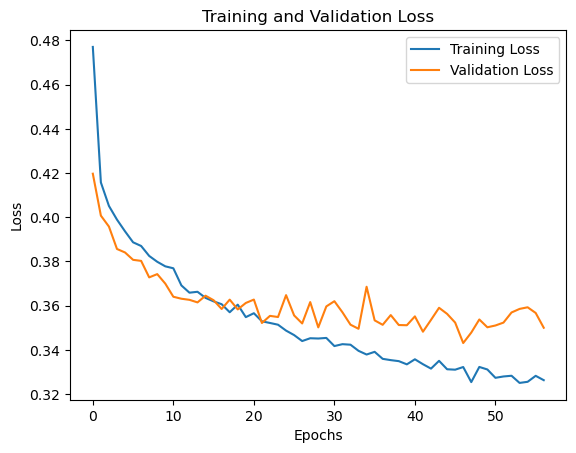

In [78]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The plot above shows that the difference between the training and validation loss begins to increase towards the end of the model training, showing that the model is overfitting on the training data.

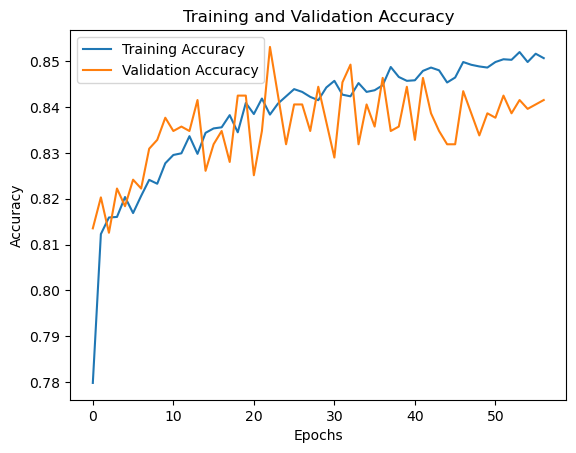

In [79]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The plot above shows that the model does not show comparable skill on both the training and validation data as the difference between training and validation accuracy is noticeable, also hinting at the model overfitting on the training data

# Performing prediction on the test set

In [80]:
# Performing prediction on the testing set
y_pred2 = dnn_model2.predict(x_test)
y_pred2 = (y_pred2 > 0.5).astype(int)
y_pred2

33/33 [==============================] - 0s 2ms/step


array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [81]:
# Printing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred2)
cm

array([[439,  95],
       [ 73, 428]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

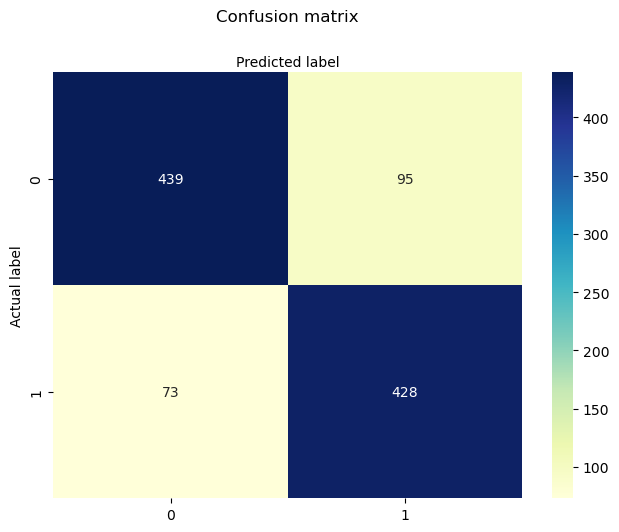

In [82]:
# visualizing the confusion matrix
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create a heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The confusion matrix for the model indicates the following:

1. True Positive (TP): There are 439 instances that are correctly predicted as positive (actual positive and predicted positive).
2. True Negative (TN): There are 428 instances that are correctly predicted as negative (actual negative and predicted negative).
3. False Positive (FP): There are 95 instances that are incorrectly predicted as positive (actual negative but predicted positive).
4. False Negative (FN): There are 73 instances that are incorrectly predicted as negative (actual positive but predicted negative).

In [83]:
# Getting the accuracy score of the model
score = accuracy_score(y_test, y_pred2)
score

0.8376811594202899

In [84]:
# Getting the Receiver Operating Characteristic (ROC) score
roc_auc = roc_auc_score(y_test, y_pred2)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8381943977214111


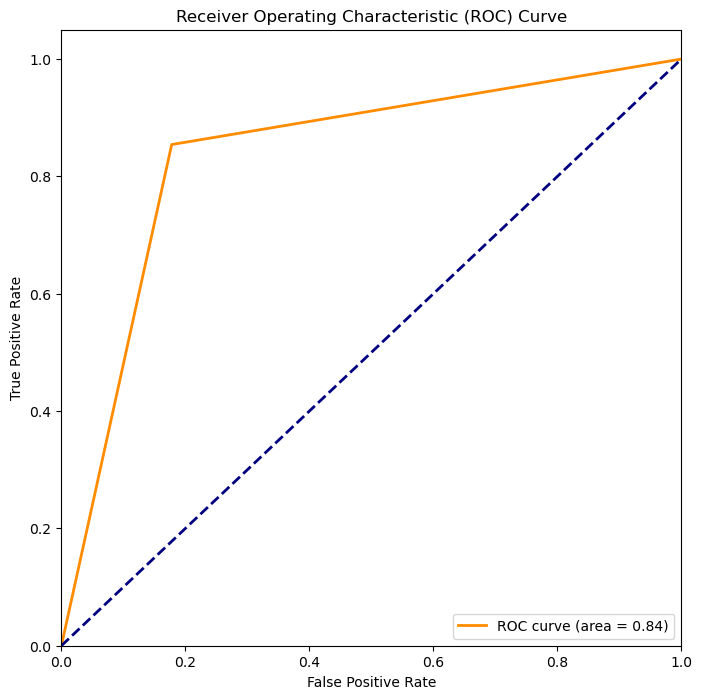

ROC AUC Score: 0.8381943977214111


In [85]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'ROC AUC Score: {roc_auc}')

The model has an AUC of **0.84** which suggests that it displays satisfactory classification capabilities on the testing set.

In [86]:
# getting the loss and accuracy of the model
dnn_eval2 = dnn_model2.evaluate(x_test, y_test)
dnn_eval2

33/33 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8377


[0.3374616205692291, 0.8376811742782593]

The model has a loss of **0.34** and an accuracy of **0.84**, which suggests it has a satifactory performance.

In [87]:
# Evaluate the models' performance in predicting the minority class ("Yes" or 1)
dnn_evaluate2 = evaluate(y_test, y_pred2, dnn_model2)
dnn_evaluate2

{'Model': <keras.engine.sequential.Sequential at 0x23d07f469a0>,
 'Precision_Score': 0.8183556405353728,
 'Recall_Score': 0.8542914171656687,
 'F1_Score': 0.8359375,
 'Accuracy': 0.8376811594202899}

In [88]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       534
           1       0.82      0.85      0.84       501

    accuracy                           0.84      1035
   macro avg       0.84      0.84      0.84      1035
weighted avg       0.84      0.84      0.84      1035



**These results indicate the performance of a binary classification model on the "No" (0) and "Yes" (1) classes.**

The model performs relatively well in predicting both classes with high precision, recall, accuracy, and F1-score, however looking at the training and validation loss and accuracy curves, the model shows signs of overfitting on the training data.

# Final Model Evaluation

In [89]:
model_eval2 = pd.DataFrame({
    "Deep Neural Network": dnn_evaluate,
    "Tuned Deep Neural Network": dnn_evaluate2,
    "1D Convolutional Neural Network": cnn_evaluate
})
model_eval2

,Deep Neural Network,Tuned Deep Neural Network,1D Convolutional Neural Network
Model,<keras.engine.sequential.Sequential object at ...,<keras.engine.sequential.Sequential object at ...,<keras.engine.sequential.Sequential object at ...
Precision_Score,0.820225,0.818356,0.808194
Recall_Score,0.874251,0.854291,0.866267
F1_Score,0.846377,0.835938,0.836224
Accuracy,0.846377,0.837681,0.835749


The dataframe above shows that the initial Deep Neural Network outperforms both the Tuned Deep Neural Network and the 1D CNN in terms of precision, recall, F1-score, and accuracy. The inital Deep Neural Network is also shown to not overfit on the training data when looking at the training and validation loss and accuracy curves, when compared to the other models which shows clear signs of overfitting.

# Saving the DNN model for future use

In [91]:
# Save the model after training
dnn_model.save('dnn_model.keras')

In [99]:
# Saving the scaler
joblib.dump(min_scaler, 'min_scaler.joblib')

['min_scaler.joblib']

In [111]:
# Save the new encoded dataset
df.to_csv('churn_df.csv', index=False)

In [147]:
visualizer(dnn_model, file_name='first_dnn_model', file_format='png')

In [148]:
visualizer(cnn_model, file_name='1d_cnn_model', file_format='png')